In [2]:
from pathlib import Path
from PIL import Image
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt 
from concurrent.futures import ThreadPoolExecutor
import functools

In [3]:
dset_path = Path('../gazecapture/')

In [13]:
new_h, new_w = 288, 288
shape = {}
orig_reszied = []
i = 0
for case in dset_path.iterdir():
    if i > 10: break
    for frame in (case / 'frames').iterdir():
        fimg = Image.open(frame)
        w, h = fimg.size
        if str((w, h)) not in shape:
            resized_fimg = fimg.resize((new_h, new_w))
            orig_reszied.append(fimg)
            orig_reszied.append(resized_fimg)
            shape[str((w, h))] = 1
            break
    i+=1

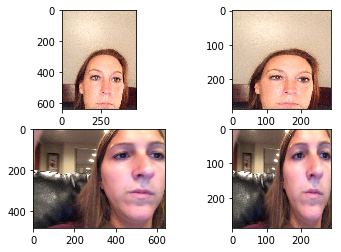

In [15]:
fig, axs = plt.subplots(len(orig_reszied) // 2, 2)
for image, ax in zip(orig_reszied, axs.flatten()):
    ax.imshow(image)

# New Folder & Resize

In [3]:
new_path = dset_path/'..'/'gazecapture-224x224'
new_path.mkdir(exist_ok=True)

In [4]:
def resize_case(case):
    cn = case.name
    (new_path/cn).mkdir(exist_ok=True)
    (new_path/cn/'frames').mkdir(exist_ok=True)
    frames = list((case/'frames').iterdir())
    with ThreadPoolExecutor(8) as e: e.map(functools.partial(resize_image, cn=cn), frames)

In [5]:
def resize_image(fn, cn):
    Image.open(fn).resize((224, 224)).save(new_path/cn/'frames'/fn.name)

In [7]:
cases = list(dset_path.iterdir())
with ThreadPoolExecutor(8) as e: e.map(resize_case, cases)